In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,847 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
import pandas as pd
import numpy as np

# 통계분석 패키지
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest #비율검정

from scipy.stats import shapiro # 샤피로=윌크 검정
from scipy.stats import chi2_contingency #카이제곱검정
from statsmodels.stats.anova import anova_lm # ANOVA


#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('axes',unicode_minus=False)

plt.rc('font',family='NanumGothic')
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("font",family="NanumGothic")


plt.rc('font', family='NanumBarunGothic') 

#ols : 최소자승법
from statsmodels.formula.api import ols
#선형모델 formula (y~ X1+X2 ...)
import statsmodels.formula.api as smf 
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
import statsmodels.api as sm
# 여기서는 정규성과 등분산, 독립성을 그래프로 판단함

#모델평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
#로지스틱 회귀
from statsmodels.api import Logit

#rmse(없어서 다시 만듦)
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [2]:
# sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

#sklearn.tree+export_graphviz
from sklearn.tree import export_graphviz
import graphviz

#Over sampling

from imblearn.over_sampling import SMOTE
#grid search
from sklearn.model_selection import GridSearchCV
#XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [7]:
cook=pd.read_csv("cookingdata_version6.csv",encoding='euc-kr')
cook.rename(columns = {'불량여부':'불량'},inplace=True)
cook['불량']=np.where(cook['불량']=='불량',1,0)


In [8]:
#품목별_불량률이 높은 품목의 양품 불량 갯수

cook_top5=cook[(cook['품목코드']=='13A00422')|(cook['품목코드']== '23D01143')|(cook['품목코드']== '13P03010')|(cook['품목코드']== '13R02052')|(cook['품목코드']== '13D01150')]
cook_top5

,순번,생산라인코드,생산라인명,품목코드,품목명,작업장코드,충전실온도,실링온도,쿠킹온도,쿠킹스팀압력,...,생산시간,생산일자,불량,발생시간,발생시간파생,종료시간,오류조치시간,비가동코드,Error_Message,오류발생작업장명
57,22,D004,PET병,13R02052,이마트베스트스테이크소스,W005,71.748776,119.648776,155.279326,23.754,...,72.56,2021-01-06,0,0,0,0,0.0,0,0,0
58,23,D004,PET병,13R02052,이마트베스트스테이크소스,W005,69.540389,112.840389,148.407889,23.712,...,71.91,2021-01-06,0,0,0,0,0.0,0,0,0
59,24,D004,PET병,13R02052,이마트베스트스테이크소스,W005,70.551088,103.851088,139.624988,23.849,...,73.14,2021-01-06,0,0,0,0,0.0,0,0,0
60,25,D004,PET병,13R02052,이마트베스트스테이크소스,W005,70.131415,102.431415,137.915566,23.656,...,79.73,2021-01-06,0,0,0,0,0.0,0,0,0
72,18,P004,PET#1,13R02052,이마트베스트스테이크소스,W007,72.417951,122.317951,158.223751,23.937,...,74.56,2021-01-05,0,0,0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7378,1,C002,쿠커 #2,23D01143,요거트드레싱(재),W003,71.544539,91.844539,127.532439,23.792,...,71.85,2018-04-06,0,0,0,0,0.0,0,0,0
12639,16,C002,쿠커 #2,23D01143,요거트드레싱(재),W003,68.705855,79.205855,113.532355,22.884,...,0.00,2017-11-10,1,0:10,24,0:22,12.0,W003444,점도이상,쿠킹실
12640,14,C002,쿠커 #2,23D01143,요거트드레싱(재),W003,69.837754,80.937754,115.496154,23.039,...,0.00,2017-11-10,1,21:32,21,0:09,2723.0,W003711,기타,쿠킹실
17258,13,C002,쿠커 #2,23D01143,요거트드레싱(재),W003,69.894817,87.494817,122.277617,23.189,...,0.00,2018-12-07,1,8:30,8,9:18,48.0,W0036D1,사이드 글라스,쿠킹실


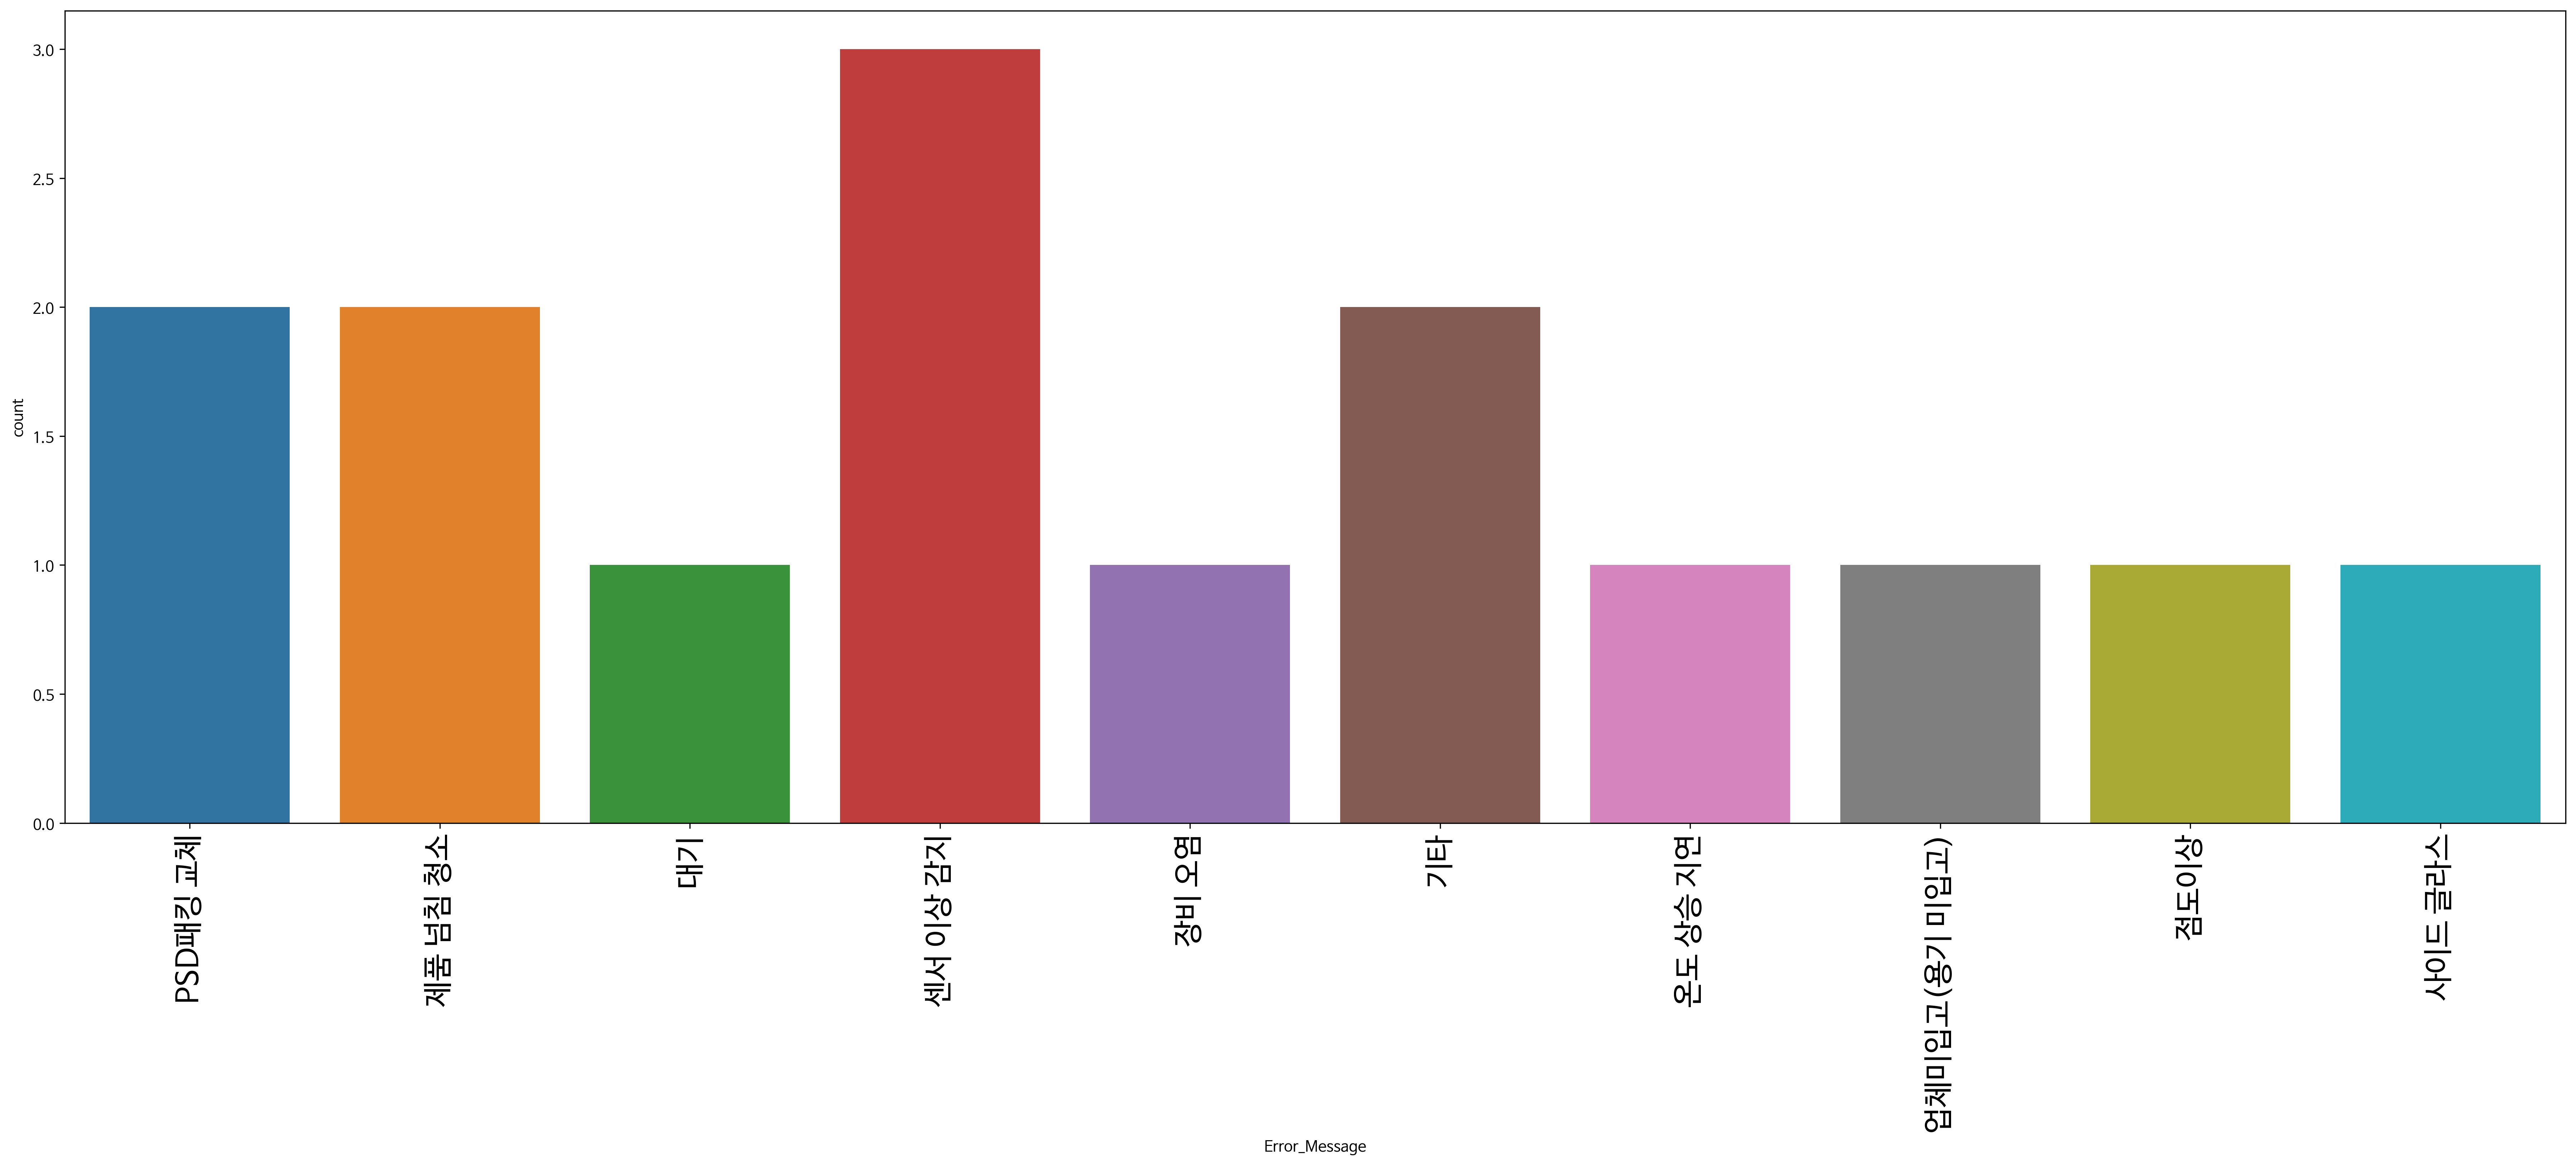

In [9]:
#불량률 높은 상위5개품목의 error messeage 분포 
error_count=cook_top5[cook_top5['불량']==1]
error_count

matplotlib.rc('axes',unicode_minus=False)

plt.rc('font',family='NanumGothic')
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("font",family="NanumGothic")


plt.rc('font', family='NanumBarunGothic') 
#오류메세지별 불량갯수
#sns.set(font_scale = 2)
plt.figure(figsize = (30,10),dpi=300)

ax=sns.countplot(x=error_count['Error_Message'],data=error_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(size=20)
sns.set_style("white")


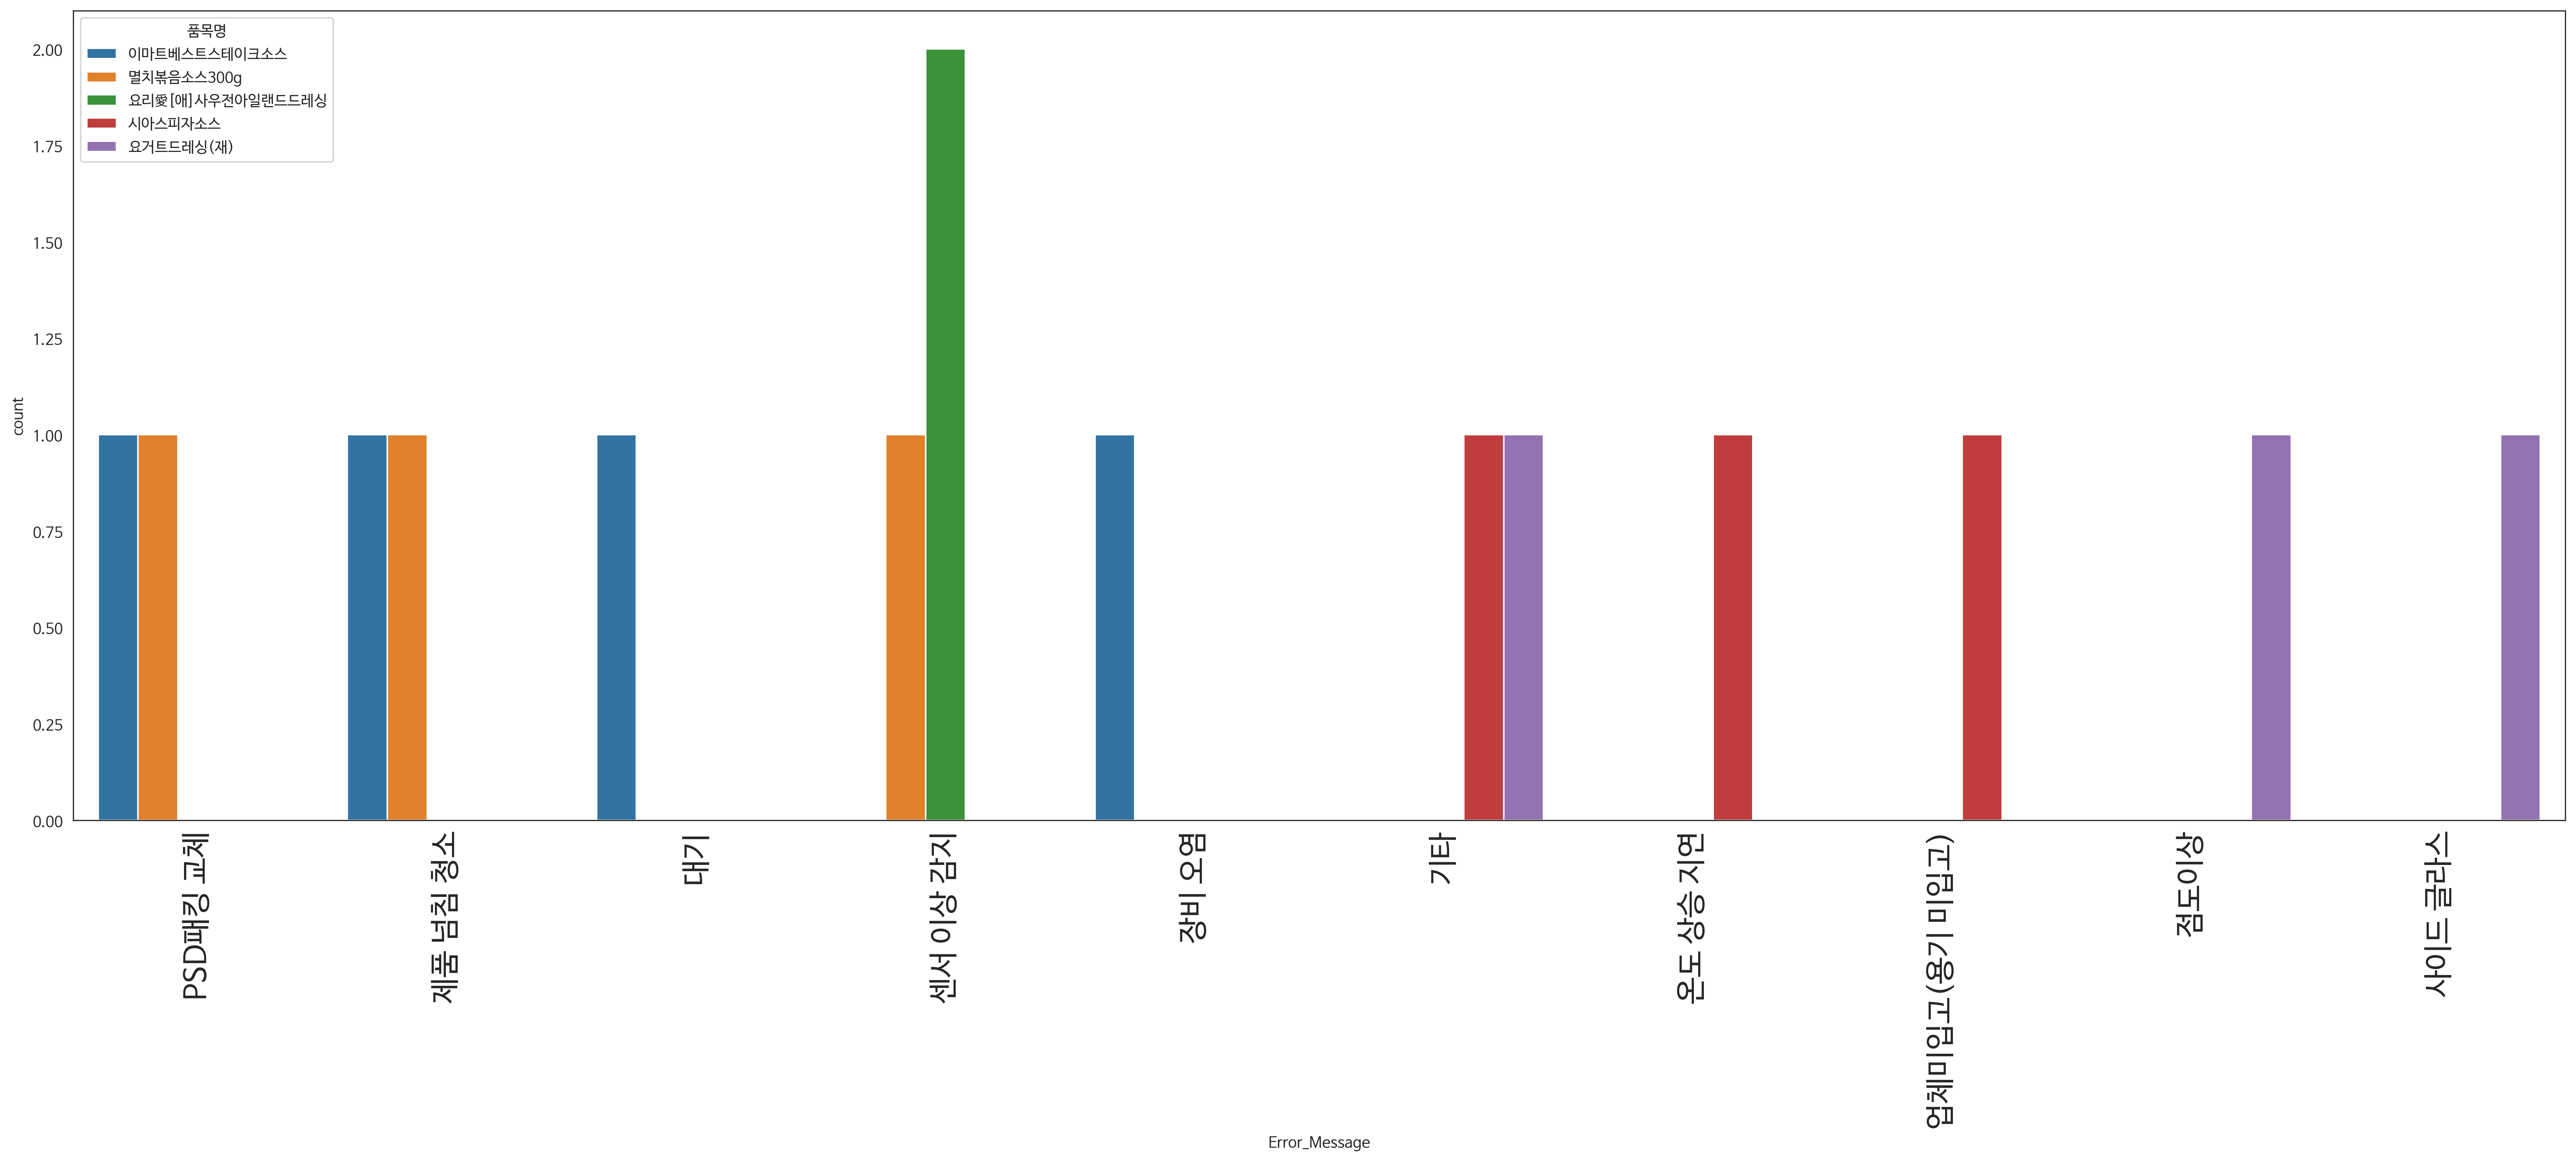

In [10]:
#불량률 높은 상위5개품목의 error messeage 분포 
error_count=cook_top5[cook_top5['불량']==1]
#error_count=error_count.groupby('품목명')['불량'].count()
#error_count=pd.DataFrame(error_count)
error_count
matplotlib.rc('axes',unicode_minus=False)

plt.rc('font',family='NanumGothic')
plt.rcParams["font.family"] = 'NanumGothicCoding'
matplotlib.rc("font",family="NanumGothic")


plt.rc('font', family='NanumBarunGothic') 
#오류메세지별 불량갯수
#sns.set(font_scale = 2)
plt.figure(figsize = (30,10),dpi=300)

ax=sns.countplot(x=error_count['Error_Message'],data=error_count,hue='품목명')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.xticks(size=20)
sns.set_style("white")
